In [1]:
# import multi tracker analysis
import multi_tracker_analysis as mta

import h5py
print(h5py.__version__)

2.6.0


In [2]:
# load hdf5 data as a pandas dataframe, and load the configuration
# change the argument to match your data path

#pd, config = mta.read_hdf5_file_to_pandas.load_and_preprocess_data('/home/tom/src/catkin/src/multi_tracker/examples/sample_data/')
#pd, config = mta.read_hdf5_file_to_pandas.load_and_preprocess_data('/media/tb/data-sets/dickinson/demo_1/data/20161014_151638_N1_trackedobjects.hdf5')
pd, config = mta.read_hdf5_file_to_pandas.load_and_preprocess_data('/media/tb/data-sets/dickinson/retracked/01')

File is not a trackedobjects file, looking for a trackedobjects file in this directory
Found:  /media/tb/data-sets/dickinson/retracked/01/20161025_131804_N1_trackedobjects.hdf5


/usr/lib/python2.7/dist-packages/pandas/core/dtypes.py:115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


Preprocessing data - see config file for details!
[]
Found too many, or too few files
No delete cut join instructions found in path!


In [3]:
# pandas dataframe structure: each row is a measurement corresponding to one of the objects for each frame
pd.keys()

Index([u'angle', u'area', u'frames', u'measurement_x', u'measurement_y',
       u'objid', u'position_x', u'position_y', u'time_epoch_nsecs',
       u'time_epoch_secs', u'velocity_x', u'velocity_y', u'time_epoch',
       u'speed'],
      dtype='object')

In [4]:
# show the object id's
import numpy as np
np.unique(pd.objid)

array([ 467,  497,  507,  522,  527,  540,  545,  553,  596,  601,  606,
        613,  616,  755,  786, 1269, 1274, 1302, 1305, 1312, 1315, 1320,
       1321, 1323, 1325, 1449, 1478, 1513, 1517, 1707, 1714, 1715, 1720,
       1721, 1722, 1724, 1728, 1730, 1731, 1732, 1746, 1755, 1756, 1757,
       1794, 1856, 1910, 1915, 1916, 1918, 1924, 1981, 2074, 2138, 2606,
       2608, 2702, 2706, 2716, 2730, 3146, 3163, 3186, 3189, 3192, 3193,
       3213, 3226, 3241, 3249, 3250, 3252, 3263, 3312, 3359, 3365, 3369,
       3372, 3383, 3401, 3407, 3409, 3410, 3603, 3813, 3833, 3845, 3853,
       3855, 3890, 3942, 3953, 3962, 3975, 4017, 4040, 4051, 4063, 4066,
       4081, 4088, 4102, 4104, 4114, 4126, 4145, 4158, 4169, 4184, 4213,
       4222, 4233, 4316, 4329, 4556, 4660, 4680, 4684, 4688, 4690, 4702,
       4706, 4826, 4830, 4831, 4835, 4836, 4844, 4848, 4851, 4855, 4865,
       4893, 4941, 4945, 4959, 4968, 4975, 4997, 5002, 5035, 5039, 5046,
       5054, 5495, 5582, 5655, 5787, 5791, 5872, 58

In [5]:
position_for_10 = pd[pd.objid==10].position_x.values
position_for_10

array([], dtype=float64)

In [6]:
# wrap pandas dataframe into a dataset object for intuitive processing
# note: using copy=True creates a copy of the data
#       this allows you to add attributes to trajecties and pickle the dataset structure for future use
dataset = mta.read_hdf5_file_to_pandas.Dataset(pd, config=config)
dataset.load_keys() # load the object ids
trajec = dataset.trajec(dataset.keys[1]) # load the 1st (2nd?) trajectory
trajec.position_x # show the position x data

array([ 281.        ,  281.        ,  281.        ,  281.42564185,
        281.79656775,  282.02272692,  282.14878741,  282.6197718 ,
        282.92878802,  283.13152152,  283.26131553,  283.33869348,
        283.37717904,  283.38654065,  283.3744813 ,  283.34742169,
        283.31078894,  283.26908059,  283.52923789,  283.73532412,
        284.19652479,  284.36825225,  285.09831808,  285.93564053,
        286.52677966,  286.92335637,  287.19381547,  287.72253566,
        288.08241117,  288.32509545,  288.78907463,  289.12076485,
        289.34531184,  289.69513538,  290.02774368,  290.24345206,
        290.38104119,  290.46074647,  290.71947117])

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

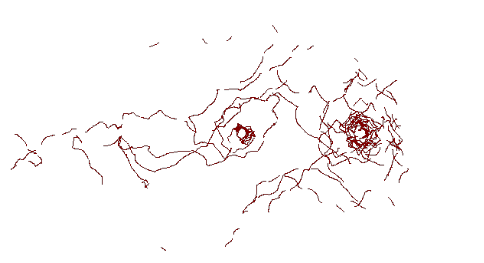

In [8]:
# plot the trajectory; this requires downloading my plotting library: https://github.com/florisvb/FlyPlotLib
# binsx, binsy = mta.plot.get_bins_from_backgroundimage(backgroundimage)

'''
print(type(dataset))
print(dir(dataset))
print(dataset.pd)
'''

bgimg = mta.plot.get_filename(config.path, 'bgimg')
binsx, binsy = mta.plot.get_bins_from_backgroundimage(bgimg)

# mta.plot.plot_trajectories(dataset, dataset.keys)
mta.plot.plot_trajectories(dataset.pd, binsx, binsy)

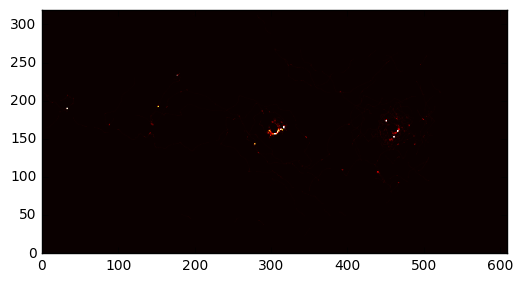

In [9]:
# make a heatmap of the trajectories
bgimg = mta.plot.get_filename(config.path, 'bgimg')
binsx, binsy = mta.plot.get_bins_from_backgroundimage(bgimg)
mta.plot.plot_heatmap(pd, binsx, binsy)